**Predict which people are influential in a social network**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df_train = pd.read_csv('/content/drive/MyDrive/data1/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/data1/test.csv')
df_train.head()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
0,0,228,302,3,0.583979,0.100503,0.100503,0.100503,0.362150,2,166.500000,11355.000000,34463,29808,1689,15.430498,3.984029,8.204331,0.332423,6.988815,66,75.530303,1916.893939
1,0,21591,1179,228,90.456506,25.798292,5.709329,1.111159,5.176620,369,18.442971,1330.366048,39262,848,1610,40.495021,8.943607,3.227677,0.564343,1.070321,163,132.030675,2931.515337
2,0,7310,1215,101,25.503644,9.556347,5.361519,0.591206,3.589718,95,68.927835,5999.896907,3622,482,206,0.734696,0.354379,0.603202,0.100503,0.603202,3,10.333333,277.333333
3,0,20,7,2,7.690824,0.277306,1.331508,0.100503,2.830627,6,2.000000,96.166667,19562,17637,278,572.874856,390.293681,27.552040,7.167557,32.101906,1762,23.469296,1395.845634
4,1,45589,862,2641,148.854279,36.998884,27.881768,3.333492,23.861282,551,127.404293,2833.847943,7554,1711,181,21.601866,3.581661,6.764657,1.119727,4.563246,85,48.500000,1993.627907


In [48]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Choice               5500 non-null   int64  
 1   A_follower_count     5500 non-null   int64  
 2   A_following_count    5500 non-null   int64  
 3   A_listed_count       5500 non-null   int64  
 4   A_mentions_received  5500 non-null   float64
 5   A_retweets_received  5500 non-null   float64
 6   A_mentions_sent      5500 non-null   float64
 7   A_retweets_sent      5500 non-null   float64
 8   A_posts              5500 non-null   float64
 9   A_network_feature_1  5500 non-null   int64  
 10  A_network_feature_2  5500 non-null   float64
 11  A_network_feature_3  5500 non-null   float64
 12  B_follower_count     5500 non-null   int64  
 13  B_following_count    5500 non-null   int64  
 14  B_listed_count       5500 non-null   int64  
 15  B_mentions_received  5500 non-null   f

In [49]:
df_train.describe()

,Choice,A_follower_count,A_following_count,A_listed_count,A_mentions_received,A_retweets_received,A_mentions_sent,A_retweets_sent,A_posts,A_network_feature_1,A_network_feature_2,A_network_feature_3,B_follower_count,B_following_count,B_listed_count,B_mentions_received,B_retweets_received,B_mentions_sent,B_retweets_sent,B_posts,B_network_feature_1,B_network_feature_2,B_network_feature_3
count,5500.000000,5.500000e+03,5.500000e+03,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5.500000e+03,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,0.509455,6.498840e+05,1.265895e+04,5952.453273,2.666032e+03,1032.371839,6.011873,1.109924,9.090730,5267.768000,84.805209,3747.219758,6.854869e+05,12738.259818,5903.148364,2.554598e+03,997.149954,6.099658,1.106236,9.505821,5254.933636,85.024196,3745.175480
std,0.499956,2.028787e+06,4.900867e+04,17339.141191,2.916543e+04,10954.953223,9.519797,1.910104,18.311060,28946.777345,104.073204,5757.339852,2.160612e+06,50054.520874,16298.462018,2.508873e+04,9342.006880,9.729557,1.939914,19.424680,26778.820125,106.689384,5518.399590
min,0.000000,1.600000e+01,0.000000e+00,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000,2.000000e+01,0.000000,0.000000,1.005034e-01,0.100503,0.100503,0.100503,0.100503,0.000000,0.000000,0.000000
25%,0.000000,2.663750e+03,3.220000e+02,85.000000,3.453649e+00,0.716816,0.359534,0.100503,0.632440,12.000000,14.991870,1180.805341,2.498250e+03,322.000000,75.000000,3.260473e+00,0.714556,0.356943,0.100503,0.822584,11.000000,15.176568,1206.500000
50%,1.000000,4.558900e+04,7.780000e+02,932.000000,4.876542e+01,14.029113,2.299666,0.341936,3.555194,195.000000,54.925234,2206.420734,4.402700e+04,773.000000,890.000000,4.876542e+01,14.029113,2.251398,0.341936,3.342999,190.000000,54.925234,2206.420734
75%,1.000000,3.927380e+05,2.838000e+03,6734.000000,3.498196e+02,118.704407,7.198330,1.320681,10.691878,1323.000000,109.695652,4390.379310,3.701142e+05,2838.000000,6734.000000,3.743699e+02,107.081021,6.866840,1.320681,10.600502,1323.000000,112.191489,4349.908608
max,1.000000,3.654319e+07,1.165830e+06,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1121.000000,144651.461538,3.654319e+07,664324.000000,549144.000000,1.145219e+06,435825.874241,76.809514,16.290540,193.072418,920838.000000,1861.583333,75526.083333


In [50]:
df_train.shape

(5500, 23)

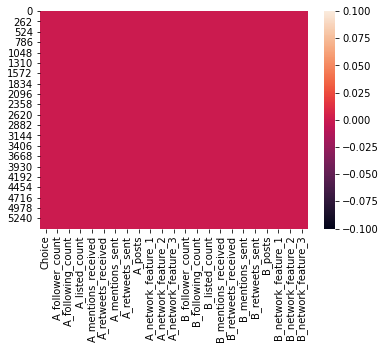

In [51]:
sns.heatmap(data=df_train.isnull())

Clean data, No missing Values

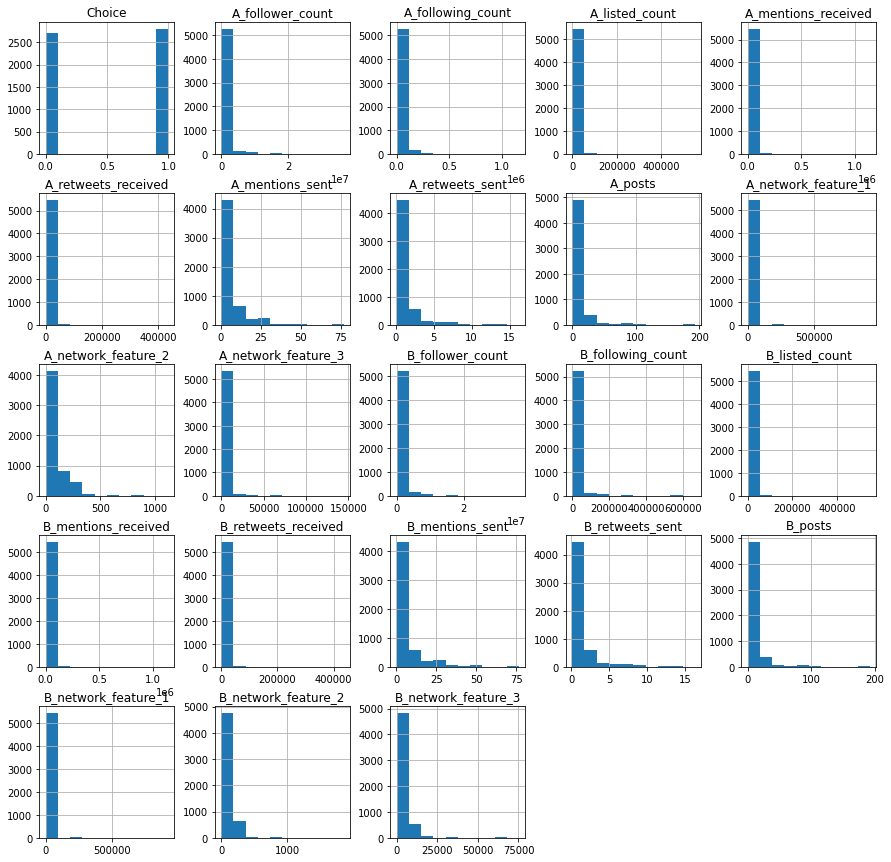

In [52]:
df_train.hist(figsize=(15,15))
plt.show()

In [53]:
# Defining predictors and target 
predictors = list(df_train.columns[1:])
target = [df_train.columns[0]]
A_predictors = list(df_train.columns[1:12])
B_predictors = list(df_train.columns[12:23])
X_train = df_train[predictors]
y_train = df_train[target]

In [54]:
choice_A= df_train.loc[df_train['Choice']==0]
choice_B= df_train.loc[df_train['Choice']==1]

In [55]:
# visualizing each column distribution
#x_space = np.linspace(start= df_train.A_follower_count.min(), stop=df_train.A_follower_count.max(),num=len(df_train['A_follower_count']))
x_space = np.linspace(start= choice_A.A_follower_count.min(), stop=choice_A.A_follower_count.max(),num=len(choice_A['A_follower_count']))
len(x_space)

2698

In [56]:
x1_space = np.linspace(start= df_train.B_follower_count.min(), stop=df_train.B_follower_count.max(),num=len(df_train['B_follower_count']))
x1_space = np.linspace(start= choice_B.B_follower_count.min(), stop=choice_B.B_follower_count.max(),num=len(choice_B['B_follower_count']))
len(x1_space)

2802

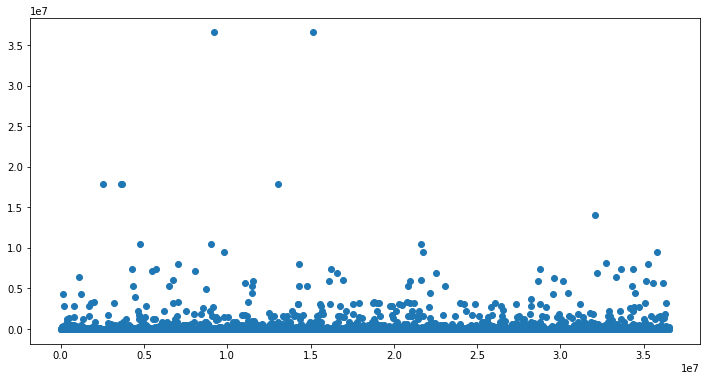

In [57]:
fig = plt.figure(figsize=(12,6))
plt.scatter(x_space,choice_A['A_follower_count'])

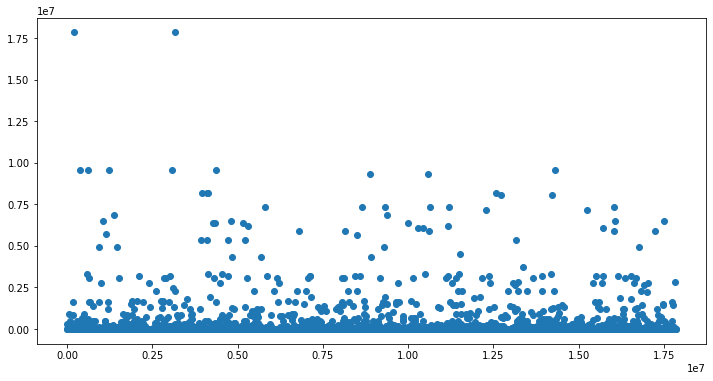

In [58]:
fig = plt.figure(figsize=(12,6))
plt.scatter(x1_space,choice_B['B_follower_count'])

In [59]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5952 entries, 0 to 5951
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A_follower_count     5952 non-null   int64  
 1   A_following_count    5952 non-null   int64  
 2   A_listed_count       5952 non-null   int64  
 3   A_mentions_received  5952 non-null   float64
 4   A_retweets_received  5952 non-null   float64
 5   A_mentions_sent      5952 non-null   float64
 6   A_retweets_sent      5952 non-null   float64
 7   A_posts              5952 non-null   float64
 8   A_network_feature_1  5952 non-null   int64  
 9   A_network_feature_2  5952 non-null   float64
 10  A_network_feature_3  5952 non-null   float64
 11  B_follower_count     5952 non-null   int64  
 12  B_following_count    5952 non-null   int64  
 13  B_listed_count       5952 non-null   int64  
 14  B_mentions_received  5952 non-null   float64
 15  B_retweets_received  5952 non-null   f

In [62]:
A_predictors = list(df_test.columns[1:12])
B_predictors = list(df_test.columns[12:23])
X_test = df_test

In [63]:
X_train.info(), X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   A_follower_count     5500 non-null   int64  
 1   A_following_count    5500 non-null   int64  
 2   A_listed_count       5500 non-null   int64  
 3   A_mentions_received  5500 non-null   float64
 4   A_retweets_received  5500 non-null   float64
 5   A_mentions_sent      5500 non-null   float64
 6   A_retweets_sent      5500 non-null   float64
 7   A_posts              5500 non-null   float64
 8   A_network_feature_1  5500 non-null   int64  
 9   A_network_feature_2  5500 non-null   float64
 10  A_network_feature_3  5500 non-null   float64
 11  B_follower_count     5500 non-null   int64  
 12  B_following_count    5500 non-null   int64  
 13  B_listed_count       5500 non-null   int64  
 14  B_mentions_received  5500 non-null   float64
 15  B_retweets_received  5500 non-null   f

(None, None)

In [75]:
X= df_train[predictors] 
y =df_train[target]

In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test,  y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=5)

In [83]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, roc_curve, roc_auc_score, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis

models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "SVM" :SVR(),
    "XGbr":XGBRegressor(),
    "SGD": SGDRegressor(),
    "Decisiontree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(x_train, y_train)
    print(model[0])
    print("Score: ", m.score(x_test,y_test))
    print("")

Linear Regression
Score:  0.18322492060478335

KNN
Score:  0.7536363636363637



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVM
Score:  0.23731973613614032

[10:41:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGbr
Score:  0.46248247015361643

SGD
Score:  -1.9580848666569655e+45

Decisiontree
Score:  -0.08376534066864139



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RandomForest
Score:  0.4282916764558793

LogisticRegression
Score:  0.76



/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


**Predicting some of the value**

In [86]:
rfc = LogisticRegression()
rfc.fit(X= df_train[predictors], y =df_train[target] )
predict_values = rfc.predict(df_test)
y = predict_values
y

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


array([0, 0, 0, ..., 0, 0, 0])

In [88]:
rfc = KNeighborsClassifier()
rfc.fit(X= df_train[predictors], y =df_train[target] )
predict_values = rfc.predict(df_test)
y = predict_values
y

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


array([1, 0, 0, ..., 1, 1, 0])